# PROJECT: INVESTIGATE A DATASET(TMDb MOVIE DATA)

## Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

## Introduction
This dataset contains the information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. Certain columns,like 'cast' and 'genres' contain multiple values separated by pipe characters(|). There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. Data analysis will be done to answer the following questions:
* Ques.1 Which genres are most popular?
* Ques.2 What is the number of movies released in different year? Do number of movies increase or decrease or have no effect with       increase in time?
* Ques.3 How does popularity affect revenue? Do revenue increases,decreases or remain same with increase in time?


In [2]:
#Import statement for all the packages that will be used in this project 
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Data Wrangling

### General Properties

 Loading the data and printing out a few lines. These operations are performed to inspect data types and to look for instances of missing or possibly errant data.

In [3]:
#reading csv file
movies_df = pd.read_csv("tmdb-movies.csv")

Now printing out a few lines:

In [4]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Before data cleaning,first we have to look for different problems that are present in the dataset. For example-:
*  Checking duplicate values..
*  Checking for missing values.

To look at different problems in dataset,first we have to look the data set information.

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Also,lets see the mean, standard deviation etc.

In [6]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Taking a look at duplicate values


In [7]:
#This function return a series
movies_df.duplicated(subset=None, keep='first')


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [8]:
#Looking at total number of duplicate values:
movies_df.duplicated(subset=None, keep='first').sum()

1

In [9]:
#Checking for missing values
movies_df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#Looking at total number of missing values:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

In data cleaning phase,we will perform following operations:
*  Removing duplicated values
*  Removing missing values
*  Dropping irrelevant columns that will not be used during analysis.

In [11]:
#removing duplicated values.The following function returns DataFrame with duplicate rows removed
movies_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
#checking if the duplicated values are removed
movies_df.duplicated(subset=None, keep='first').sum()

0

In [13]:
#Removing missing values
movies_df.dropna(inplace=True)

In [14]:
#Checking if missing values are still present or not 
movies_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
#Dropping irrelevant columns that will not be used during analysis.
movies_df.drop(['cast','homepage','tagline','keywords','overview','production_companies','release_date', 'budget_adj','vote_count','vote_average','revenue_adj'], axis = 1, inplace = True)

In [16]:
#To check whether the changes are made or not
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 10 columns):
id                1992 non-null int64
imdb_id           1992 non-null object
popularity        1992 non-null float64
budget            1992 non-null int64
revenue           1992 non-null int64
original_title    1992 non-null object
director          1992 non-null object
runtime           1992 non-null int64
genres            1992 non-null object
release_year      1992 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 171.2+ KB


## Exploratory Data Analysis

### Research Question 1:  Which genres are most popular?

In [17]:
#Let's see the data first
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015


In [18]:
#Take all the genres into a series named genre and splitting it around '|' 
genre = pd.Series(movies_df['genres'])
genre = genre.str.split(pat='|', n=-1, expand=False)
#Now converting the series into the flat list using a variable named list1
list1 =[]
for sublist in genre:
    for item in sublist:
        list1.append(item)
# Now converting the list back into Series for performing some operations on it.
list1 = pd.Series(list1)
#Counting the frequency of each genres to check which genre is most popular.
counts = list1.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
#Freuency or count of each genre is shown :

counts = pd.DataFrame(counts)
print(counts)

                   0
Drama            838
Comedy           640
Thriller         575
Action           532
Adventure        361
Science Fiction  291
Romance          291
Horror           273
Crime            262
Family           233
Fantasy          202
Animation        170
Mystery          148
Documentary       93
Music             72
History           56
War               44
Western           20
TV Movie          16
Foreign            6


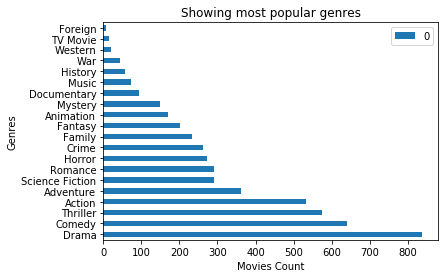

In [19]:
#Now plotting of above result
b = counts.plot.barh()
b.set_xlabel("Movies Count")
b.set_ylabel("Genres")
b.set_title("Showing most popular genres")

plt.show()

By the above graph, we can say that the most popular genre is Drama among all the genres. According to this analysis, most of the movies are based on drama followed by Comedy,Triller,Action and so on

### Research Question 2:  What is the number of movies released in different year? Do number of movies increase or decrease or have no effect with increase in time?

In [20]:
#Extracting the required columns from the data frame
g1 =movies_df [['release_year','id']]
#let us use the groupby() function to group by release year since we have to see the nmber of movies with respect to different years.
g1=g1.groupby( ["release_year"] ).count()
#Now seeing number of movies w.r.t years
print(g1)

               id
release_year     
1961            1
1962            1
1963            1
1964            2
1965            1
1967            1
1969            1
1970            1
1971            4
1972            1
1973            2
1974            2
1975            3
1976            2
1977            3
1978            4
1979            5
1980            2
1981            6
1982            3
1983            6
1984            5
1985            4
1986            2
1987            8
1988            4
1989            5
1990            6
1991            3
1992            5
1993           10
1994            8
1995           10
1996           15
1997           11
1998           13
1999           24
2000           20
2001           19
2002           31
2003           40
2004           48
2005           72
2006           92
2007          135
2008          142
2009          192
2010          206
2011          219
2012          145
2013          128
2014          153
2015          165


Text(0,0.5,'Number of movies released')

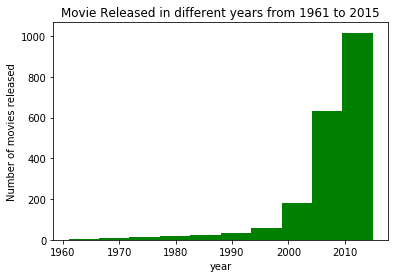

In [21]:
plt.hist(movies_df['release_year'],color='green')
plt.title('Movie Released in different years from 1961 to 2015')
plt.xlabel('year')
plt.ylabel('Number of movies released')

From the above analysis, we can see that number of movies is increasing with time,i.e.,from 1961 to 2015, the number of movies are increased with time.

### Research Question 3:  How does popularity affect revenue?  Do revenue increases,decreases or remain same with increase in time?

In [22]:
#In this,we are trying to explore if there is any relationship between popularity and revenue. Do papularity causes the revenue to increase,decrease or remain same.
#For this, we try to calculate the corelation between the two, in order to see how strongly they are related.
#The below function calculate Pearson's r to see the corelation between two variables.
def corelation(x,y):
    #ddof=0 is passed to take uncorrected standard deviation
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    return (std_x * std_y).mean()

Calling corelation function with variables popularity and revenue

In [23]:

corelation(movies_df['popularity'],movies_df['revenue'])

0.6413460877299662

The above result is positive which means that popularity and revenue are positively corelated but do not depict very strong relationship. The value remain between -1 and 1. Value 1 means that the two variable are strongly related.But we should keep in mind, that corelation does not imply causation.

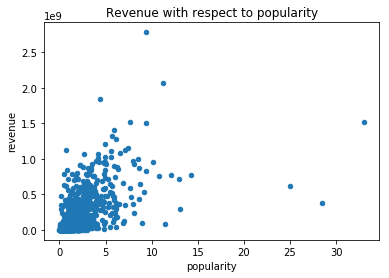

In [24]:
#Plotting for variables popularity and revenue
n =movies_df [['popularity','revenue']]
n.plot(x='popularity',y='revenue', kind='scatter',title='Revenue with respect to popularity')


From the above analysis,we can see that popularity and revenue are positively related but not much strongly related.

Checking the relation between the variables release_year and revenue

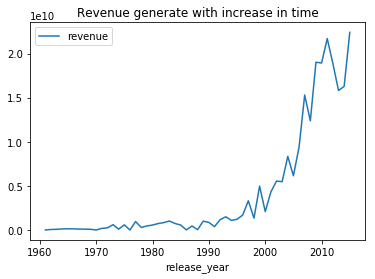

In [25]:
#selecting particular columns and grouping them according to th year and taking sum of the revenues in the respective years.
#This is done so that it can be easily plotted.
release_revenue = movies_df [['release_year','revenue']]
#plotting for variables release_year and revenue
z = release_revenue.groupby( ["release_year"] ).sum().plot(title='Revenue generate with increase in time')


From the above analysis,we can see that with increase in time,the revenue also increases.

## Conclusions

Limitations encountered during the project:

There was some odd characters in the cast column,so question such as:"Which actor or actress is most popular?" was difficult to explore due to its limitation and it is one of the potential areas to explore in future by cleaning up the odd characters.

Since the missing values were present in some columns,we dropped that full row to do the analysis which also somehow limits the proper exploration.

With the help of vote_average column,we can also explore in the near future that "which director among all the directors is most favourite with respect to vote_average".

### Ques.1 Which genres are most popular?

According to the analysis done,the most popular genre is  Drama among all the genres from 1961 to 2015. Most of the movies are based on drama followed by Comedy,Triller,Action,Adventure,Science Fiction and so on.Plotting of the result is also done for visualization of results and for better understanding.But there is a certain limitation that we cannot compare Science Fiction and Romance genres as both are equally popular between 1961 to 2015.

### Research Question 2:  What is the number of movies released in different year? Do number of movies increase or decrease or have no effect with increase in time?

From the graph, it is shown that number of movies increases with increase in time.In this,same years are grouped in the group so that we can find the number of movies in a particular year.And with increase in years,the trend of movies is also increasing.
But there are some years in which number of movies are more in previous years than in the coming years.For example,2011 have more number of movies than 2015

### Research Question 3:  How does popularity affect revenue?  Do revenue increases,decreases or remain same with increase in time?

Popularity have a positive effect on revenue but do not strongly influence revenue.Relationship between popularity and revenue is seen with the help of Pearson's r which tells that how strongly one variable is related to other variable. The result tells us that popularity and revenue are positively corelated but do not depict very strong relationship. The Pearsons's r value remain between -1 and 1. Value 1 means that the two variable are strongly related.
Also,with the help of graph plotted, we can say that revenue increases with increase in time.

## References

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html

https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.barh.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

